# **BAYESIAN CLASSIFICATION FOR NORMAL DISTRIBUTIONS**

## **The Gaussian Probability Density Function**

One of the most commonly encountered probability density functions in practice
is the **Gaussian** or **normal probability density function**. The major reasons for its popularity are its computational tractability and the fact that it models adequately a large number of cases.

The one-dimensional or the univariate Gaussian, as it is sometimes called, is
defined by
$$p(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2} \right)$$
With parameters $\mu$ (mean) and $\sigma^2$ (variance).

The multivariate generalization of a Gaussian pdf in the l-dimensional space is
given by
$$p(x) = \frac{1}{(2\pi)^{\frac{l}{2}}|\Sigma|^{\frac{1}{2}}}\exp\left(-\frac{1}{2}(x-\mu)^T \Sigma^{-1}(x-\mu) \right)$$
where $\mu = E[x]$ is the mean value and $\Sigma$ is the $l\times l$ **covariance matrix** defined as
$$\Sigma = E\left[ (x-\mu)(x-\mu)^T\right]$$
where $|\Sigma|$ denotes the determinant of $\Sigma$.

It is readily seen that for $l=1$ the multivariate Gaussian coincides with the univariate one.

The symbol $N(\mu,\Sigma)$ is used to denote a Gaussian pdf with mean value $\mu$ and covariance 	$\Sigma$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
import ipywidgets as widgets
from IPython.display import display

In [ ]:
def plot_gaussian(mu_x, mu_y, cov_xx, cov_xy, cov_yy):
    mean = [mu_x, mu_y]
    cov = [[cov_xx, cov_xy], [cov_xy, cov_yy]]

    x, y = np.mgrid[-3:3:.05, -3:3:.05]
    pos = np.dstack((x, y))
    rv = stats.multivariate_normal(mean, cov)
    z = rv.pdf(pos)

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    # Level sets
    ax1 = ax[0]
    contour = ax1.contourf(x, y, z, cmap='OrRd')
    fig.colorbar(contour, ax=ax[0], label='Density')
    ax[0].set_xlabel("X")
    ax[0].set_ylabel("Y")
    # 3D graph
    ax[1] = fig.add_subplot(122, projection='3d')
    ax[1].plot_surface(x, y, z, cmap='OrRd', edgecolor='none')
    ax[1].set_xlabel("X")
    ax[1].set_ylabel("Y")
    ax[1].set_zlabel("Density")

    plt.show()

# Widgets
mu_x = widgets.FloatText(value=0.0, description="μ_x:")
mu_y = widgets.FloatText(value=0.0, description="μ_y:")
cov_xx = widgets.FloatText(value=1.0, description="Σ_xx:")
cov_xy = widgets.FloatText(value=0.0, description="Σ_xy:")
cov_yy = widgets.FloatText(value=1.0, description="Σ_yy:")

button = widgets.Button(description="Draw")
def on_button_click(b):
    plot_gaussian(mu_x.value, mu_y.value, cov_xx.value, cov_xy.value, cov_yy.value)

FloatText(value=0.0, description='μ_x:')

FloatText(value=0.0, description='μ_y:')

FloatText(value=1.0, description='Σ_xx:')

FloatText(value=0.0, description='Σ_xy:')

FloatText(value=1.0, description='Σ_yy:')

Button(description='Draw', style=ButtonStyle())

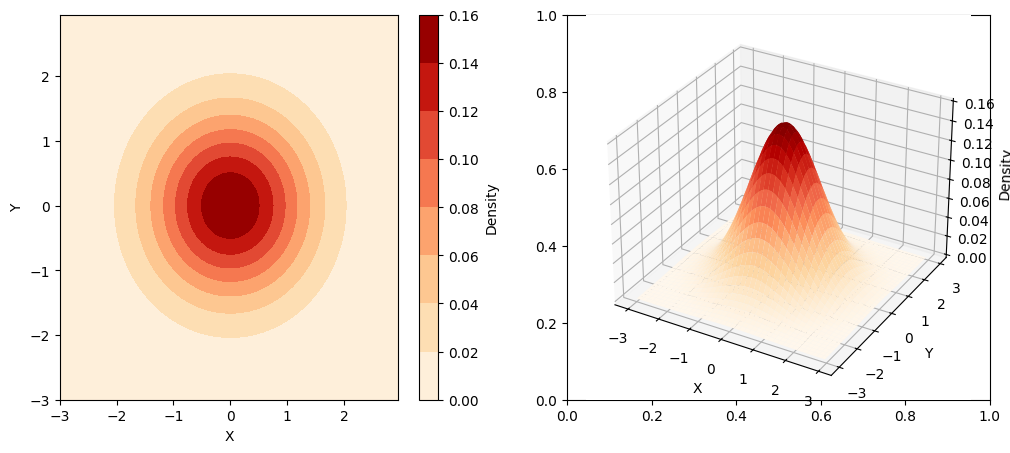

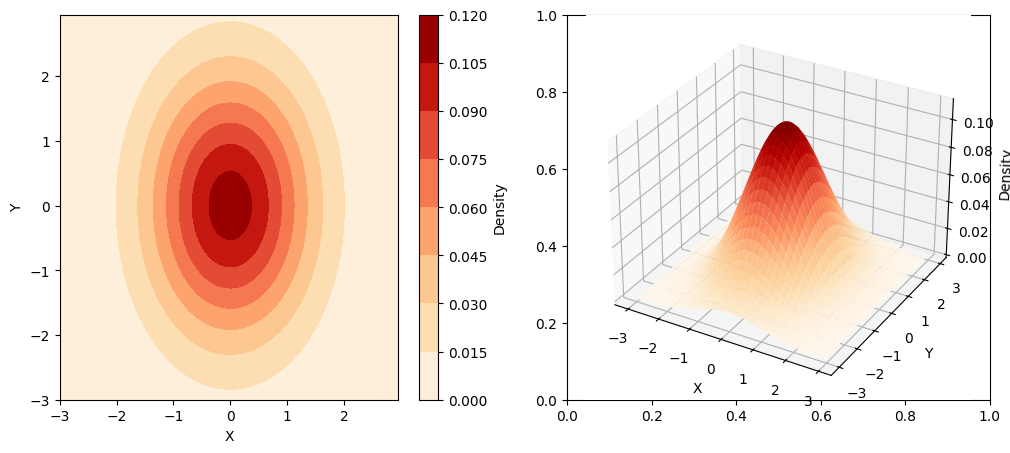

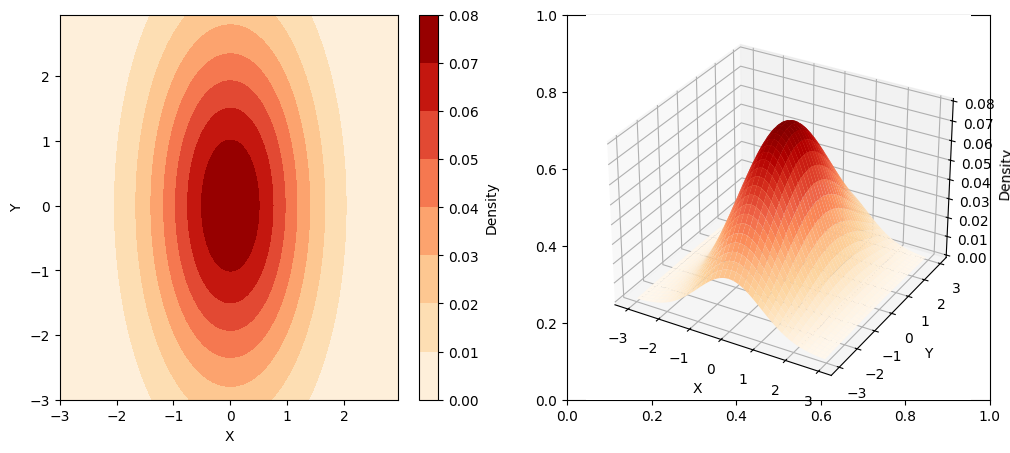

In [ ]:
button.on_click(on_button_click)
display(mu_x, mu_y, cov_xx, cov_xy, cov_yy, button)

FloatText(value=0.0, description='μ_x:')

FloatText(value=0.0, description='μ_y:')

FloatText(value=1.0, description='Σ_xx:')

FloatText(value=0.5, description='Σ_xy:')

FloatText(value=1.0, description='Σ_yy:')

Button(description='Draw', style=ButtonStyle())

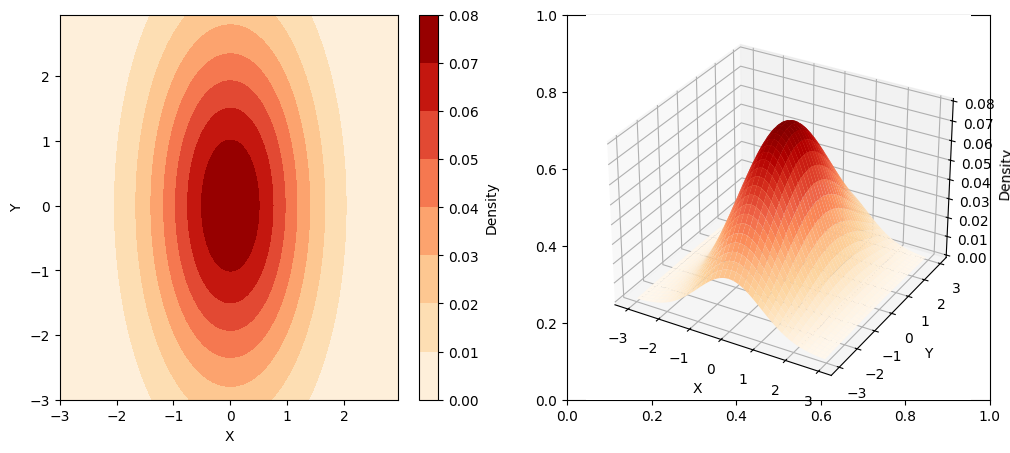

In [ ]:
button.on_click(on_button_click)
display(mu_x, mu_y, cov_xx, cov_xy, cov_yy, button)

## **The Bayesian Classifier for Normally Distributed Classes**

The optimal **Bayesian classifier** when the involved pdfs, $p(x|\omega_i), \ i=1,2,\ldots,M$ (**likelihood functions** of $\omega_i$ with respect to $x$),
describing the data distribution in each one of the classes, are **multivariate normal distributions**, that is,
$$N(\mu_i, \Sigma_i), \ i=1,2,\ldots,M$$


Because of the exponential form of the involved densities, it is preferable to work with the following **discriminant functions**, which involve the (monotonic) logarithmic function $\ln(\cdot)$:

\begin{eqnarray}
 g_i(x) &=& \ln\left(p(x|\omega_i)P(\omega_i) \right)\\
  &=&\ln p(x|\omega_i) + \ln P(\omega_i)\\
  &=& \ln\left(\frac{1}{(2\pi)^{\frac{l}{2}}|\Sigma_i|^{\frac{1}{2}}}\exp\left(-\frac{1}{2}(x-\mu_i)^T \Sigma_i^{-1}(x-\mu_i) \right) \right)+ \ln P(\omega_i)\\
  &=& \ln\left(\frac{1}{(2\pi)^{\frac{l}{2}}|\Sigma_i|^{\frac{1}{2}}}\right) + \ln\left(\exp\left(-\frac{1}{2}(x-\mu_i)^T \Sigma_i^{-1}(x-\mu_i) \right) \right)+ \ln P(\omega_i)\\
  &=& c_i-\frac{1}{2}(x-\mu_i)^T \Sigma_i^{-1}(x-\mu_i) + \ln P(\omega_i) \\
\end{eqnarray}
where $c_i$ is a constant
$c_i = -\frac{l}{2}\ln(2\pi)-\frac{1}{2}\ln |\Sigma_i|$.

Expanding, we obtain
$$g_i=-\frac{1}{2}x^T \Sigma_i^{-1} x + \frac{1}{2} x^T \Sigma_i^{-1}\mu_i +\frac{1}{2}\mu_i^T \Sigma_i^{-1}x-\frac{1}{2} \mu_i^T \Sigma_i^{-1}\mu_i +\ln P(\omega_i) + c_i \tag{eq1}$$

In general, this is a **nonlinear quadratic form**.

Take, for example, the case of $l=1$ and assume that
$$\Sigma_i = \left[\begin{matrix} \sigma_i^2 & 0 \\ 0 & \sigma_i^2\end{matrix}\right]$$
Then, **eq1** becomes
$$g_i(x) = -\frac{1}{2\sigma_i^2}(x_1^2+x_2^2) + \frac{1}{\sigma_i^2}(\mu_{i1}x_1+\mu_{i2}x_2)-\frac{1}{2\sigma_i^2}(\mu_{i1}^2+\mu_{i2}^2) + \ln P(\omega_i) +c_i$$

and obviously the associated decision curves
$$g_i(x)-g_j(x)=0$$
 are **quadrics**: ellipsoids, parabolas, hyperbolas, pairs of lines.


That is, in such cases, the Bayesian classifier is a quadratic classifier, in the sense that the partition of the feature space is performed via quadric decision surfaces. For $l>2$ the decision surfaces are **hyperquadrics**.

### **Decision Hyperplanes**


The only quadratic contribution in **eq1** comes from the term $x^T \Sigma_i^{-1} x$. If we now assume that the covariance matrix is the **same in all classes**, that is, $\Sigma_i = \Sigma$, the quadratic term will be the same in all discriminant functions.

Hence, it does not enter into the comparison for computing the maximum, and it cancels out in the **decision surface equations**.

The same is true for the constant $c_i$. Thus, they can be omitted, and we may redefine $g_i(x)$ as
$$g_i(x) = w_i^T x + w_{i0}$$
where
\begin{eqnarray}
w_i &=& \Sigma^{-1}\mu_i\\
w_{i0} &=& \ln P(\omega_i) -\frac{1}{2} \mu_i^T \Sigma^{-1}\mu_i
\end{eqnarray}
Hence $g_i(x)$ is a **linear function** of $x$ and the respective decision surface are **hyperplanes**

In [ ]:
from sklearn import datasets
from scipy.stats import multivariate_normal

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [ ]:
#Calculate parameters
classes = np.unique(y)
means = [np.mean(X[y == c], axis=0) for c in classes]
covariances = [np.cov(X[y == c].T) for c in classes]

In [ ]:
# Create the evaluation grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
granularity = 1000
xx, yy = np.meshgrid(np.linspace(x_min, x_max, granularity),
                      np.linspace(y_min, y_max, granularity))
pos = np.dstack((xx, yy))

In [ ]:
pdfs = [multivariate_normal(mean, cov).pdf(pos) for mean, cov in zip(means, covariances)]
pdfs = np.array(pdfs)

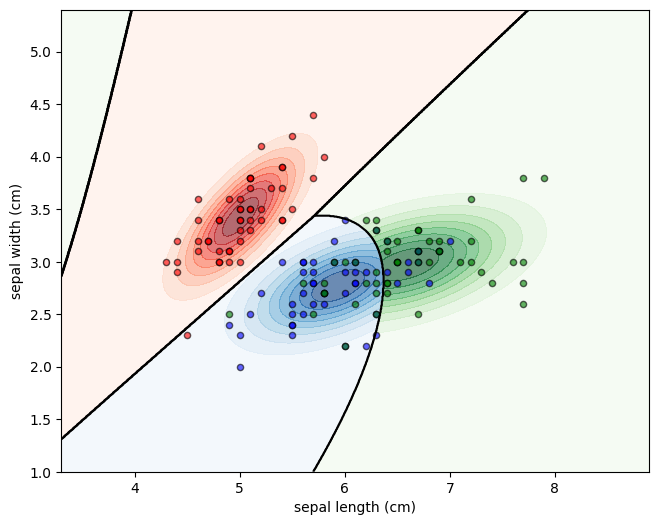

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
scalar_colors = ['Reds', 'Blues', 'Greens']
colors = ["red", "blue", "green"]

for i in range(len(classes)):
    mask = np.ones_like(pdfs[i], dtype=bool)
    for j in range(len(classes)):
      if i != j:
        mask &= pdfs[i] > pdfs[j]

    levels = np.linspace(pdfs[i].min(), pdfs[i].max(), 10)
    ax.contourf(xx, yy, pdfs[i] * mask, levels=levels, cmap=scalar_colors[i], alpha=0.6)
decision_map = np.argmax(pdfs, axis=0)
ax.contour(xx, yy, decision_map, levels=len(classes)-1, colors='k', linewidths=1.5)
for i in range(3):
    ax.scatter(X[y == i, 0], X[y == i, 1], color=colors[i], edgecolors='k', s=20, alpha=0.6)
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_aspect('equal')

plt.show()

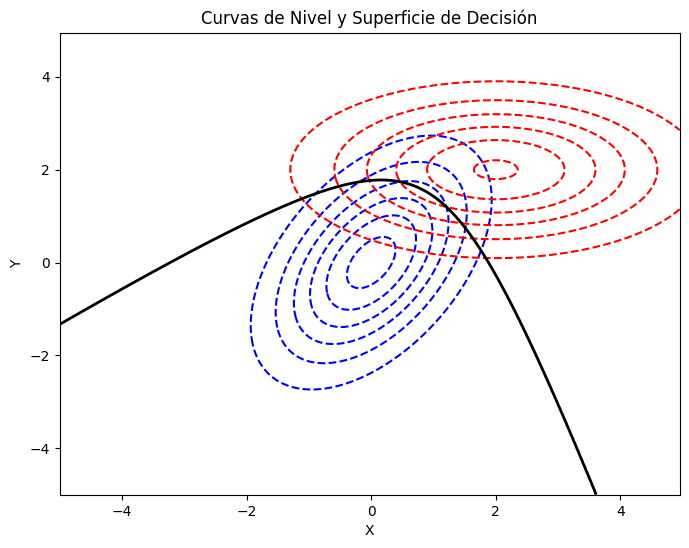

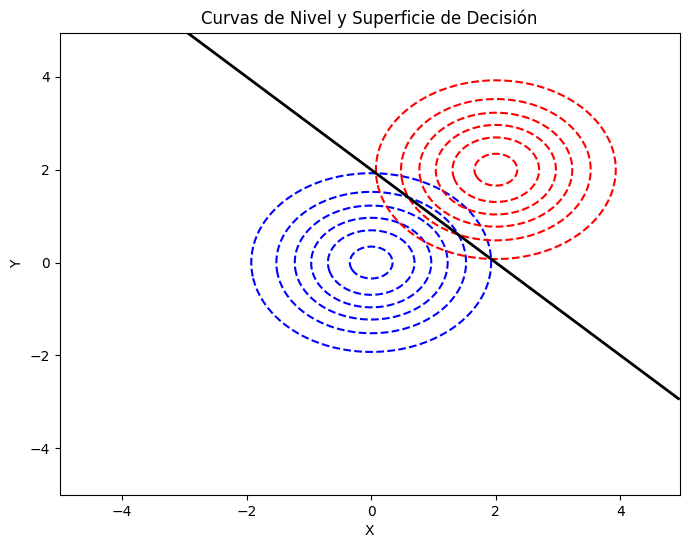

In [ ]:
def plot_decision_boundaries(mu1, cov1, mu2, cov2):
    # Crear una malla de valores
    x, y = np.mgrid[-5:5:.05, -5:5:.05]
    pos = np.dstack((x, y))

    # Definir las distribuciones normales
    rv1 = stats.multivariate_normal(mu1, cov1)
    rv2 = stats.multivariate_normal(mu2, cov2)

    # Evaluar la densidad de probabilidad
    z1 = rv1.pdf(pos)
    z2 = rv2.pdf(pos)

    # Crear la figura
    fig, ax = plt.subplots(figsize=(8, 6))

    # Graficar las curvas de nivel
    ax.contour(x, y, z1, levels=6, colors='blue', linestyles='dashed')
    ax.contour(x, y, z2, levels=6, colors='red', linestyles='dashed')

    # Graficar la superficie de decisión (donde p(x|w1) = p(x|w2))
    decision_boundary = (z1 - z2)
    ax.contour(x, y, decision_boundary, levels=[0], colors='black', linewidths=2)

    ax.set_title("Curvas de Nivel y Superficie de Decisión")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    plt.show()

# Widgets para los parámetros de las distribuciones
mu1_x = widgets.FloatText(value=0.0, description="μ1_x:")
mu1_y = widgets.FloatText(value=0.0, description="μ1_y:")
cov1_xx = widgets.FloatText(value=1.0, description="Σ1_xx:")
cov1_xy = widgets.FloatText(value=.7, description="Σ1_xy:")
cov1_yy = widgets.FloatText(value=2.0, description="Σ1_yy:")

mu2_x = widgets.FloatText(value=2.0, description="μ2_x:")
mu2_y = widgets.FloatText(value=2.0, description="μ2_y:")
cov2_xx = widgets.FloatText(value=3.0, description="Σ2_xx:")
cov2_xy = widgets.FloatText(value=0.0, description="Σ2_xy:")
cov2_yy = widgets.FloatText(value=1.0, description="Σ2_yy:")

button_plot = widgets.Button(description="Graficar")

def on_button_click(b):
    mu1 = [mu1_x.value, mu1_y.value]
    cov1 = [[cov1_xx.value, cov1_xy.value], [cov1_xy.value, cov1_yy.value]]

    mu2 = [mu2_x.value, mu2_y.value]
    cov2 = [[cov2_xx.value, cov2_xy.value], [cov2_xy.value, cov2_yy.value]]

    plot_decision_boundaries(mu1, cov1, mu2, cov2)

button_plot.on_click(on_button_click)

# Organizar los widgets en columnas
column1 = widgets.VBox([mu1_x, mu1_y, cov1_xx, cov1_xy, cov1_yy])
column2 = widgets.VBox([mu2_x, mu2_y, cov2_xx, cov2_xy, cov2_yy])
button_column = widgets.VBox([button_plot])

# Mostrar los widgets en columnas
display(widgets.HBox([column1, column2]), button_column)